In [1]:
# Install required libraries
!pip install numpy pandas matplotlib seaborn scikit-learn opencv-python tensorflow


In [2]:
# Import essential libraries
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from skimage.feature import graycomatrix, graycoprops
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [3]:
# Define paths
first_print_path = '/content/drive/MyDrive/Pain/First Print-20250324T161923Z-001/First Print'
second_print_path = '/content/drive/MyDrive/Second Print-20250324T161933Z-001/Second Print'

# Load file paths
first_print_images = [os.path.join(first_print_path, img) for img in os.listdir(first_print_path) if img.endswith('.png')]
second_print_images = [os.path.join(second_print_path, img) for img in os.listdir(second_print_path) if img.endswith('.png')]

print(f"Number of first print images: {len(first_print_images)}")
print(f"Number of second print images: {len(second_print_images)}")


Number of first print images: 100
Number of second print images: 100


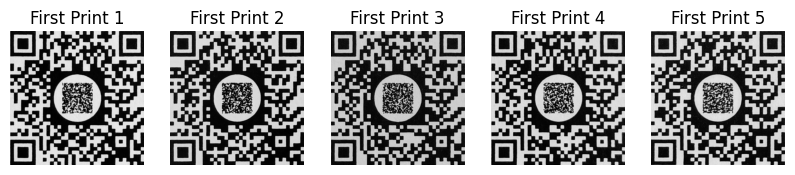

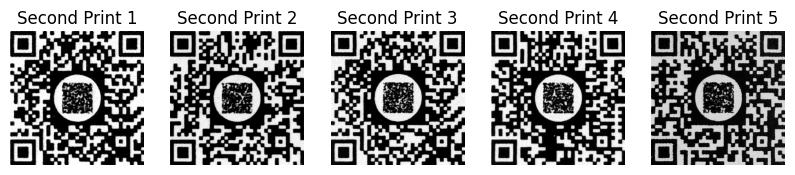

In [4]:
# Display sample images
def display_samples(images, title):
    plt.figure(figsize=(10, 5))
    for i in range(5):
        img = cv2.imread(images[i], cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'{title} {i+1}')
        plt.axis('off')
    plt.show()

display_samples(first_print_images, 'First Print')
display_samples(second_print_images, 'Second Print')


In [5]:
def extract_glcm_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    glcm = graycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    return [contrast, correlation, energy, homogeneity]


In [6]:
def create_feature_dataset(images, label):
    data = []
    for img in images:
        features = extract_glcm_features(img)
        features.append(label)
        data.append(features)
    return data

# Create datasets for both classes
first_print_data = create_feature_dataset(first_print_images, 0)
second_print_data = create_feature_dataset(second_print_images, 1)

# Create DataFrame
columns = ['contrast', 'correlation', 'energy', 'homogeneity', 'label']
df = pd.DataFrame(first_print_data + second_print_data, columns=columns)

print(df.head())


     contrast  correlation    energy  homogeneity  label
0  260.873926     0.985365  0.070039     0.443427      0
1  280.213844     0.983936  0.063757     0.439925      0
2  336.181716     0.979955  0.049804     0.361268      0
3  292.523740     0.982587  0.055227     0.387053      0
4  253.714832     0.984998  0.049061     0.354590      0


In [15]:
X = df.drop('label', axis=1)
y = df['label']

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# ----> Split training data into training and validation sets
X_train_img, X_val_img, y_train_img, y_val_img = train_test_split(
    X_train_img, y_train_img, test_size=0.2, random_state=42
)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,       # Rotate by 10 degrees
    width_shift_range=0.1,   # Shift horizontally by 10%
    height_shift_range=0.1,  # Shift vertically by 10%
    zoom_range=0.1,          # Zoom by 10%
    horizontal_flip=True     # Flip horizontally
)

# Fit data augmentation to training data
datagen.fit(X_train_img)

# Train CNN with augmented data
cnn_model.fit(datagen.flow(X_train_img, y_train_img, batch_size=32),
              validation_data=(X_val_img, y_val_img),
              epochs=20)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 875ms/step - accuracy: 0.5558 - loss: 0.7107 - val_accuracy: 0.5385 - val_loss: 0.6603
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6101 - loss: 0.6661 - val_accuracy: 0.5385 - val_loss: 0.6659
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 717ms/step - accuracy: 0.5371 - loss: 0.6843 - val_accuracy: 0.5385 - val_loss: 0.6514
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 566ms/step - accuracy: 0.4846 - loss: 0.6894 - val_accuracy: 0.5385 - val_loss: 0.6457
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 552ms/step - accuracy: 0.5257 - loss: 0.6783 - val_accuracy: 0.5385 - val_loss: 0.6419
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 700ms/step - accuracy: 0.4404 - loss: 0.6961 - val_accuracy: 0.5385 - val_loss: 0.6462
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 610ms/step - accuracy: 0.4508 - loss: 0.6857 - val_accuracy: 0.6154 - val_loss: 0.6488
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 576ms/step - accuracy: 0.5620 - loss: 0.6831 - val_accuracy: 0.5385 - val_loss: 0.6366
Epoch 

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.83      0.75      0.79        20

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40

Confusion Matrix:
 [[17  3]
 [ 5 15]]


In [25]:
features = df.drop('label', axis=1)  # Features
labels = df['label']

# Feature extraction using GLCM or other methods
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for RF
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold CV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)

# Fit Grid Search Model
grid_search.fit(X_train, y_train)

# Best parameters and model
best_rf_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Evaluate best model on validation data
y_pred_rf = best_rf_model.predict(X_val)
print(classification_report(y_val, y_pred_rf))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.95      0.95      0.95        19

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [26]:
# Load images and resize them
def load_and_process_images(image_paths, label, img_size=(128, 128)):
    data = []
    for img_path in image_paths:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, img_size)
        data.append([img, label])
    return data

# Create image dataset
image_data = load_and_process_images(first_print_images, 0) + load_and_process_images(second_print_images, 1)

# Prepare images and labels
X_images = np.array([item[0] for item in image_data]).reshape(-1, 128, 128, 1)
y_labels = np.array([item[1] for item in image_data])

# Normalize and one-hot encode
X_images = X_images / 255.0
y_labels = to_categorical(y_labels, 2)

# Split dataset
X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(X_images, y_labels, test_size=0.2, random_state=42)


In [27]:
# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(2, activation='softmax'))

# Compile model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN
history = cnn_model.fit(X_train_img, y_train_img, epochs=10, validation_split=0.2, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 796ms/step - accuracy: 0.4458 - loss: 3.3817 - val_accuracy: 0.4688 - val_loss: 1.6478
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5604 - loss: 1.8514 - val_accuracy: 0.5312 - val_loss: 1.1755
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 682ms/step - accuracy: 0.4958 - loss: 1.1153 - val_accuracy: 0.7188 - val_loss: 0.6645
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 693ms/step - accuracy: 0.6458 - loss: 0.6516 - val_accuracy: 0.5312 - val_loss: 0.6402
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 781ms/step - accuracy: 0.5938 - loss: 0.6301 - val_accuracy: 0.7188 - val_loss: 0.5862
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 672ms/step - accuracy: 0.7396 - loss: 0.5279 - val_accuracy: 0.8125 - val_loss: 0.5016
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 745ms/step - accuracy: 0.8760 - loss: 0.4212 - val_accuracy: 0.8125 - val_loss: 0.3862
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9344 - loss: 0.2692 - val_accuracy: 0.9062 - val_loss: 0.31

In [28]:
# Evaluate CNN
cnn_loss, cnn_acc = cnn_model.evaluate(X_test_img, y_test_img)
print(f"CNN Accuracy: {cnn_acc:.2f}")

# Confusion Matrix for CNN
y_pred_cnn = np.argmax(cnn_model.predict(X_test_img), axis=1)
y_true_cnn = np.argmax(y_test_img, axis=1)

print("CNN Classification Report:\n", classification_report(y_true_cnn, y_pred_cnn))
print("Confusion Matrix:\n", confusion_matrix(y_true_cnn, y_pred_cnn))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9563 - loss: 0.2505 
CNN Accuracy: 0.95
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.89      0.94        19

    accuracy                           0.95        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

Confusion Matrix:
 [[21  0]
 [ 2 17]]


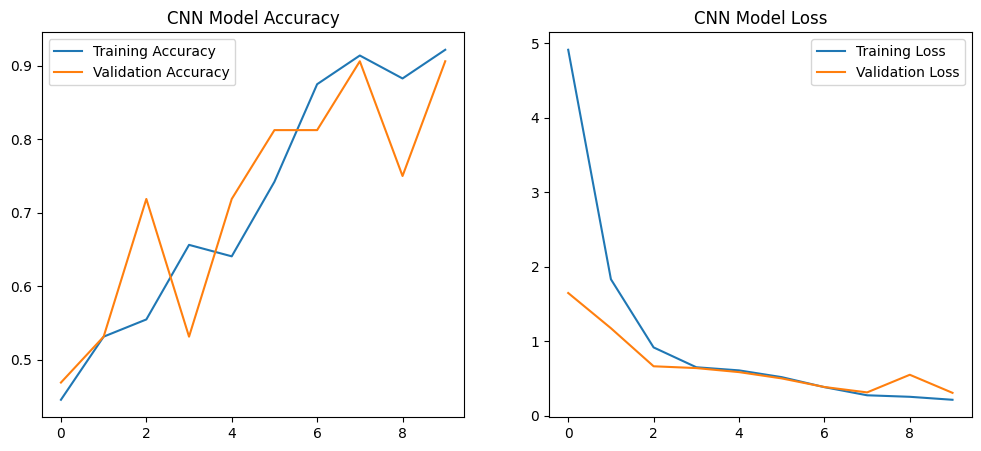

In [29]:
# Plot training accuracy and loss for CNN
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.legend()

plt.show()


In [30]:
import joblib
joblib.dump(best_rf_model, 'rf_model.pkl')

cnn_model.save('cnn_model.h5')
